In [125]:
import re 
import string
import PyPDF2

In [126]:
# creating a pdf file object 
pdfFileObj = open('young-robert-f-the-dandelion-girl.pdf', 'rb') 
  
# creating a pdf reader object 
pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 

pages = []

for page in range(pdfReader.numPages):
    pages.append(pdfReader.getPage(page).extractText())
    
# closing the pdf file object 
pdfFileObj.close()
pages

['-\n1\n-\n \n \nThe Dandelion Girl\n \nRobert F. Young\n \n \nThe girl on the hill made Mark think of Edna St. Vincent Millay. Perhaps it was because \nof the way she was standing there in the afternoon sun, her dandelion\n-\nhued hair dancing in the \nwind; perhaps it was because of \nthe way her old\n-\nfashioned white dress was swirling around her \nlong and slender legs. In any event, he got the definite impression that she had somehow stepped \nout of the past and into the present; and that was odd, because as things turned out, it wasn\'t t\nhe \npast she had stepped out of, but the future.\n \n \nHe paused some distance behind her, breathing hard from the climb. She had not seen \nhim yet, and he wondered how he could apprise her of his presence without alarming her. While \nhe was trying to make up his \nmind, he took out his pipe and filled and lighted it, cupping his \nhands over the bowl and puffing till the tobacco came to glowing life. When he looked at her \nagain, she h

In [127]:
f=open('pdf.txt','w')
for page in range(len(pages)):
    f.write(pages[page])
f.close()

In [128]:
with open('pdf.txt') as f:
    clean = f.read().splitlines()

In [129]:
clean

['-',
 '1',
 '-',
 ' ',
 ' ',
 'The Dandelion Girl',
 ' ',
 'Robert F. Young',
 ' ',
 ' ',
 'The girl on the hill made Mark think of Edna St. Vincent Millay. Perhaps it was because ',
 'of the way she was standing there in the afternoon sun, her dandelion',
 '-',
 'hued hair dancing in the ',
 'wind; perhaps it was because of ',
 'the way her old',
 '-',
 'fashioned white dress was swirling around her ',
 'long and slender legs. In any event, he got the definite impression that she had somehow stepped ',
 "out of the past and into the present; and that was odd, because as things turned out, it wasn't t",
 'he ',
 'past she had stepped out of, but the future.',
 ' ',
 ' ',
 'He paused some distance behind her, breathing hard from the climb. She had not seen ',
 'him yet, and he wondered how he could apprise her of his presence without alarming her. While ',
 'he was trying to make up his ',
 'mind, he took out his pipe and filled and lighted it, cupping his ',
 'hands over the bowl and 

In [130]:
shear = [i.replace('-','') for i in clean ]
shear = [re.sub(r'[^\w\s]', "", s) for s in shear] # get rid of punctuation
shear = [re.sub(r'\w*\d\w*', "", s) for s in shear] # get rid of numbers

shears = [x for x in shear if x != ' ']
shearss = [x for x in shears if x != '']

In [131]:
shear

['',
 '',
 '',
 ' ',
 ' ',
 'The Dandelion Girl',
 ' ',
 'Robert F Young',
 ' ',
 ' ',
 'The girl on the hill made Mark think of Edna St Vincent Millay Perhaps it was because ',
 'of the way she was standing there in the afternoon sun her dandelion',
 '',
 'hued hair dancing in the ',
 'wind perhaps it was because of ',
 'the way her old',
 '',
 'fashioned white dress was swirling around her ',
 'long and slender legs In any event he got the definite impression that she had somehow stepped ',
 'out of the past and into the present and that was odd because as things turned out it wasnt t',
 'he ',
 'past she had stepped out of but the future',
 ' ',
 ' ',
 'He paused some distance behind her breathing hard from the climb She had not seen ',
 'him yet and he wondered how he could apprise her of his presence without alarming her While ',
 'he was trying to make up his ',
 'mind he took out his pipe and filled and lighted it cupping his ',
 'hands over the bowl and puffing till the tobacco

In [132]:
shears

['',
 '',
 '',
 'The Dandelion Girl',
 'Robert F Young',
 'The girl on the hill made Mark think of Edna St Vincent Millay Perhaps it was because ',
 'of the way she was standing there in the afternoon sun her dandelion',
 '',
 'hued hair dancing in the ',
 'wind perhaps it was because of ',
 'the way her old',
 '',
 'fashioned white dress was swirling around her ',
 'long and slender legs In any event he got the definite impression that she had somehow stepped ',
 'out of the past and into the present and that was odd because as things turned out it wasnt t',
 'he ',
 'past she had stepped out of but the future',
 'He paused some distance behind her breathing hard from the climb She had not seen ',
 'him yet and he wondered how he could apprise her of his presence without alarming her While ',
 'he was trying to make up his ',
 'mind he took out his pipe and filled and lighted it cupping his ',
 'hands over the bowl and puffing till the tobacco came to glowing life When he looked at he

In [133]:
shearss

['The Dandelion Girl',
 'Robert F Young',
 'The girl on the hill made Mark think of Edna St Vincent Millay Perhaps it was because ',
 'of the way she was standing there in the afternoon sun her dandelion',
 'hued hair dancing in the ',
 'wind perhaps it was because of ',
 'the way her old',
 'fashioned white dress was swirling around her ',
 'long and slender legs In any event he got the definite impression that she had somehow stepped ',
 'out of the past and into the present and that was odd because as things turned out it wasnt t',
 'he ',
 'past she had stepped out of but the future',
 'He paused some distance behind her breathing hard from the climb She had not seen ',
 'him yet and he wondered how he could apprise her of his presence without alarming her While ',
 'he was trying to make up his ',
 'mind he took out his pipe and filled and lighted it cupping his ',
 'hands over the bowl and puffing till the tobacco came to glowing life When he looked at her ',
 'again she had turn

In [134]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import numpy as np
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy [pylab.py:160]


In [135]:
vect = CountVectorizer(ngram_range=(1,1),stop_words='english')

In [136]:
dtm = vect.fit_transform(shearss)

In [137]:
dtm

<571x1161 sparse matrix of type '<class 'numpy.int64'>'
	with 2267 stored elements in Compressed Sparse Row format>

In [138]:
pd.DataFrame(dtm.toarray(),columns=vect.get_feature_names())

,able,abrupt,absence,access,accident,according,act,acute,ad,added,...,yearn,years,yellow,yes,yesterday,yo,youd,youll,young,youre
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
lda = LatentDirichletAllocation(n_components=5)

In [140]:
lda_dtf = lda.fit_transform(dtm)

In [141]:
import numpy as np
sorting=np.argsort(lda.components_)[:,::-1]
features=np.array(vect.get_feature_names())

In [142]:
import mglearn
mglearn.tools.print_topics(topics=range(5), feature_names=features,
sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
time          said          face          day           tell          
come          went          wind          yesterday     living        
eyes          julie         pipe          years         moment        
came          im            street        saw           long          
right         hill          anne          hair          mr            
love          way           like          gone          did           
looked        young         ago           deer          randolph      
thought       knew          things        today         room          
didnt         did           suitcase      rabbit        future        
father        afternoon     gentle        good          drops         




In [143]:
topic1 = np.argsort(lda_dtf[:,2])[::-1]
for i in topic1[:10]:
     print(shearss[i] + "\n")

Mark took a deep drag on his pipe He needed it Your father sounds like quite a 

hated himself for behaving like a lovesick schoolboy for reacting just like any other fool in his 

shoulders and let it unfold itself and it hung there in the room like gently falling snow He 

She pointed to the fringe of the forest at their feet Two Thousand and Fortieth Street runs 

She nodded solemnly Theyre a boon to people who like to stand on pleasan

November street light that they had never known in the golden radiance of the September sun

forties to a pretty face and a pair of pretty legs Up until a few days ago he had never even so 

The girl on the hill made Mark think of Edna St Vincent Millay Perhaps it was because 

looked out over the land He filled his pipe and lighted it and blew smoke into the wind My 

and lighted his pipe He forced himself to think of Anne and presently her face came into 



In [144]:
topic2 = np.argsort(lda_dtf[:,4])[::-1]
for i in topic2[:10]:
    print(shearss[i] + "\n")

gravel drive led to a dirt road that gave access to the highway His station wago

cool evenings away before the big fireplace in the raftered living room and after two days the 

creations of the leading couturiers I bought this dress Im wearing there this very morning Isnt 

away finally bowing out before the first outposts of the suburban frontier In the far distance 

long and slender legs In any event he got the definite impression that she had somehow stepped 

He prepared and ate a simple supper in the kitchen then went into the living room to 

match burned his fingers Afterward he could not remember returning to the cabin

its complement of cabin and fishing pier When his wife had been unexpectedly summoned for 

It was so pleasant hearing her talk that it did not matter really what she talked about and 

cheeks and their review of relativity did more than demonstrate that E invariably equals  it 



In [145]:
from os import path
from PIL import Image
from wordcloud import WordCloud,STOPWORDS

In [146]:
d = path.dirname(__name__)

In [147]:
text = open(path.join(d, 'pdf.txt')).read()

In [148]:
stopwords = set(STOPWORDS)

In [149]:
wc = WordCloud(background_color="black", max_words=2000, stopwords=stopwords)

In [150]:
wc.generate(text)

In [151]:
wc.to_file(path.join(d, "cloud.png"))

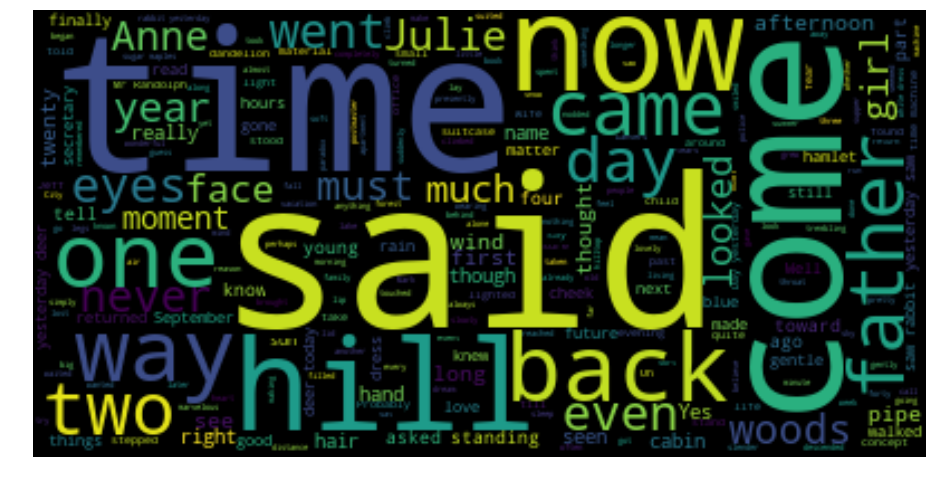

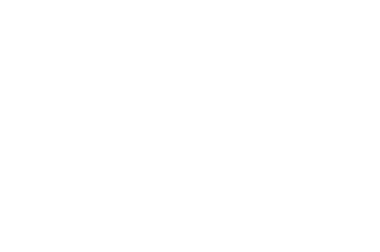

In [152]:
plt.figure(figsize=(16,13))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.axis("off")
plt.show()